In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
Y = np.array([5.26, 10.77, 21.96, 17.32, 12.07, 
              7.91, 14.02, 19.30, 8.89, 2.79,
              3.86, 15.39, 4.70, 8.78, 5.78,
              21.75, 13.02, 2.01, 10.80, 9.63,
              8.19, 3.03, 8.37, 12.34, 7.78,
              12.63, 13.99, 20.74, 17.52, 19.96, 
              12.61, 10.71, 15.23, 10.46, 10.41,
              3.37, 9.81, 5.82, 1.95, 15.25,
              19.48, 11.61, 3.32, 6.78, 7.53, 
              8.21, 7.46, 9.22, 6.17, 3.99])

X = np.array([3, 9, 7, 3, 2, 5, 8, 4, 2, 8, 
              6, 7, 5, 7, 4, 7, 6, 7, 7, 9,
              0, 5, 4, 4, 5, 4, 0, 6, 5, 8,
              7, 0, 3, 1, 1, 3, 8, 0, 7, 4,
              9, 1, 4, 8, 4, 6, 8, 8, 2, 5])

h = 2.60
alpha_1 = 0.01
n = 50


# 1. Построить графически результаты эксперимента. Сформулироать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $b_0$ и масштаба $b_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки

Линейная регрессионная модель: $b_1 = \frac{\sum\limits_{i = 1}^n {(x_i-\overline x)}(y_i-\overline y)}{(\sum\limits_{i = 1}^n {(x_i-\overline x)^2})}$ , 
$b_0 = \overline y-b_1\overline x$

In [28]:
def linear_reg(x):
    b1 = np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / \
         np.sum((X - np.mean(X))**2)
    b0 = np.mean(Y) - b1*np.mean(X)
    return b1*x + b0

Облако точек и график линейной регрессионной можели:

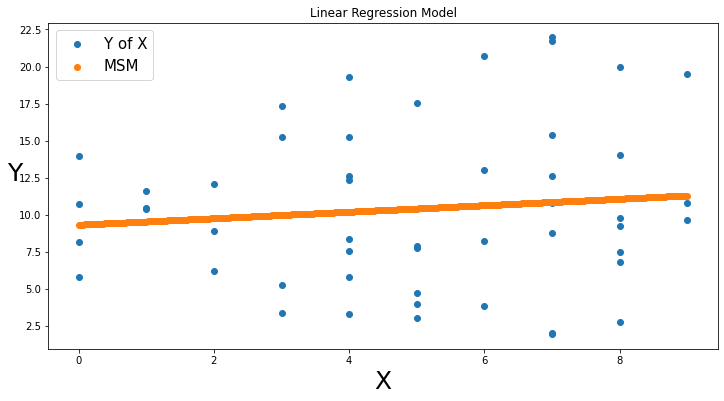

In [33]:
x = np.linspace(0, 9, 300)
y = linear_reg(x)
plt.scatter(X, Y, label = "Y of X")
plt.scatter(x, y, label = "MSM")
plt.legend(prop = {'size':15})
plt.title("Linear Regression Model")
plt.xlabel("X", fontsize = 25)
plt.ylabel("Y", fontsize = 25, rotation = 0)
plt.show()

Визуально прямая расположилаь по-середине облака

# 2. Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне $\alpha$ по $\chi^2$. Оценить расстояние ролученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт

$$S=\frac{\sum\limits_{i = 1}^n(x-\overline x)^2}{n-1}$$

In [51]:
def est_var(X, X_):
    e = (X - X_)**2
    return np.sum(e) / (n-1)

In [52]:
est_var(Y, linear_reg(X))

29.54879137482348

Гистограмма на базе ошибок с шагом h:

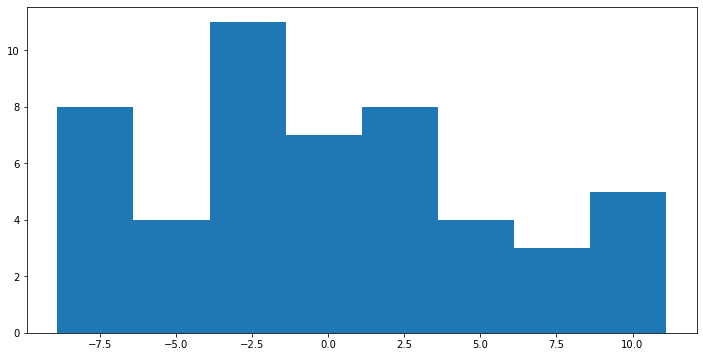

In [40]:
mist = Y - linear_reg(X)
plt.hist(mist,
         bins = np.arange(np.min(mist), np.max(mist), h).shape[0])
plt.show()

# 5. Сформулировать модель, включающую дополнительный член с 𝜒2. Построить МНК оценки параметров $b_1$, $b_2$, $b_3$ в данной модели. Изобразить графически полученную регрессионную зависимость

Расчёт 𝑏1 , 𝑏2, 𝑏3 по формулам: 

<td style="text-align: center"><img src="matrix.png" width = 300 alt="matrix"></td>

In [48]:
def square_model(x):
    S1 = np.sum(X)
    S2 = np.sum(X ** 2)
    S3 = np.sum(X ** 3)
    S4 = np.sum(X ** 4)
    S_y0 = np.sum(Y)
    S_y1 = np.sum(X @ Y)
    S_y2 = np.sum(np.square(X) @ Y)
    matrix = np.array([[n, S1, S2], [S1, S2, S3], [S2, S3, S4]])
    vector = np.array([S_y0, S_y1, S_y2]).reshape(-1, 1)
    coefs = (np.linalg.inv(matrix) @ vector)
    b3 = coefs[-1]
    b2 = coefs[1]
    b1 = coefs[0]
    return b3 * x ** 2 + b2 * x + b1

Облако точек и график квадратичной можели:

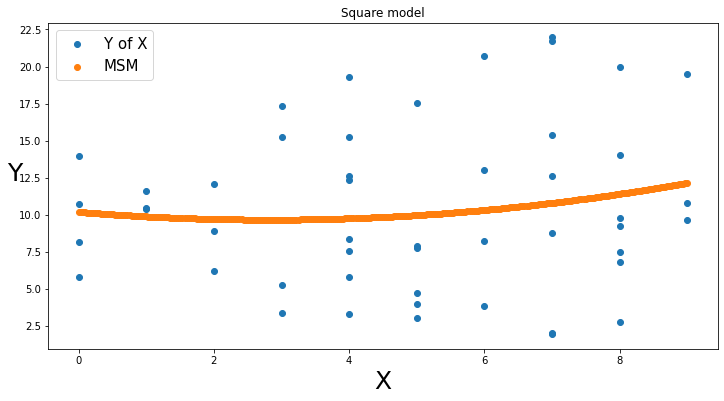

In [49]:
x = np.linspace(0, 9, 300)
y = square_model(x)
plt.scatter(X, Y, label = "Y of X")
plt.scatter(x, y, label = "MSM")
plt.legend(prop = {'size': 15})
plt.title("Square model")
plt.xlabel("X", fontsize = 25)
plt.ylabel("Y", fontsize = 25, rotation=0)
plt.show()

Визуально график прогибается ниже "середины" облака

# 6. Построить несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h

In [50]:
est_var(Y, square_model(X))

29.34674896239279

Гистограмма на базе ошибок с шагом h:

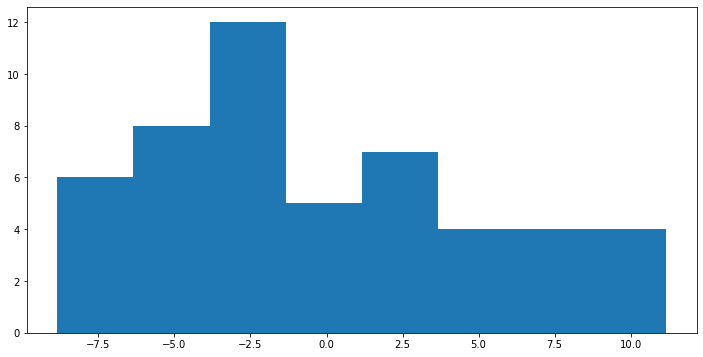

In [57]:
mist = Y - square_model(X)
plt.hist(mist,
         bins = np.arange(np.min(mist), np.max(mist), h).shape[0])
plt.show()

Линейная и квадратичная оценки несмещённой дисперсии примерно равны. Последняя немного рвномернее